# Phone Call Marketing Campaign Prediction using Classification

The main goal of this portfolio is using Classifications. The data is related to direct marketing campaigns (Phone Calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit.

In [3]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import RFE
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
%matplotlib inline

#### Importing the data

In [67]:
df = pd.read_csv('data/bank-additional-full.csv', sep=';')

In [68]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [69]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [70]:
df.shape

(41188, 21)

#### Checking if there any null value

In [71]:
df.isnull().values.any()

False

#### Dividing columns into categorical and continuous features

In [72]:
categories = []
numeric = []
for x in df.columns:
    if (isinstance(df[x][0], str) and x!='y'):
        categories.append(x)
    elif (x!='y'):
        numeric.append(x)

In [73]:
categories

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [74]:
numeric

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

#### Encoding categorical features to convert categorical features to integers

In [75]:
enc = OrdinalEncoder()

In [76]:
for x in categories:
    df[x] = enc.fit_transform(df[[x]])
df['y'] = enc.fit_transform(df[['y']])
#Droping negative because Multinomial Naive Bayes cant process negative values
df.drop(columns=['emp.var.rate', 'cons.conf.idx'], inplace=True)
numeric.remove('emp.var.rate')
numeric.remove('cons.conf.idx')

#### Using Random State [10, 20, 30, 40, 50, 60, 70, 80, 90,100] for splitting training and test data

In [77]:
all_scores_acc = {}
all_scores_auc = {}
seed_list =  [10, 20, 30, 40, 50, 60, 70, 80, 90,100]
acc_train = []
auc_train = []
acc_test = []
auc_test = []

In [78]:
for rand_seed in seed_list:
    X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='y'), df.y, random_state=rand_seed, test_size=0.30)
    
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    
    pred = gnb.predict(X_train)
    acc_train.append(accuracy_score(y_train, pred))
    auc_train.append(roc_auc_score(y_train, pred))
    
    pred = gnb.predict(X_test)
    acc_test.append(accuracy_score(y_test, pred))
    auc_test.append(roc_auc_score(y_test, pred))

all_scores_acc['ECF_GNB_Train'] = pd.Series(acc_train).mean()
all_scores_auc['ECF_GNB_Train'] = pd.Series(auc_train).mean()

all_scores_acc['ECF_GNB_Test'] = pd.Series(acc_test).mean()
all_scores_auc['ECF_GNB_Test'] = pd.Series(auc_test).mean()

In [79]:
print('Encoding categorical features with Gaussian Naive Bayes\n')
print('Train Average ACC', all_scores_acc['ECF_GNB_Train'])
print('Test Average ACC', all_scores_acc['ECF_GNB_Test'])
print()
print('Train Average AUC', all_scores_auc['ECF_GNB_Train'])
print('Test Average AUC', all_scores_auc['ECF_GNB_Test'])

Encoding categorical features with Gaussian Naive Bayes

Train Average ACC 0.8544240574381743
Test Average ACC 0.8534433924091609

Train Average AUC 0.7181120005508519
Test Average AUC 0.7137619760402601


In [80]:
acc_train.clear(); auc_train.clear(); acc_test.clear(); auc_test.clear();

In [81]:
for rand_seed in seed_list:
    X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='y'), df.y, random_state=rand_seed, test_size=0.30)
    
    mnb = MultinomialNB()
    mnb.fit(X_train, y_train)
    
    pred = mnb.predict(X_train)
    acc_train.append(accuracy_score(y_train, pred))
    auc_train.append(roc_auc_score(y_train, pred))
    
    pred = mnb.predict(X_test)
    acc_test.append(accuracy_score(y_test, pred))
    auc_test.append(roc_auc_score(y_test, pred))

all_scores_acc['ECF_MNB_Train'] = pd.Series(acc_train).mean()
all_scores_auc['ECF_MNB_Train'] = pd.Series(auc_train).mean()

all_scores_acc['ECF_MNB_Test'] = pd.Series(acc_test).mean()
all_scores_auc['ECF_MNB_Test'] = pd.Series(auc_test).mean()

In [82]:
print('Encoding categorical features with Multinomial Naive Bayes\n')
print('Train Average ACC', all_scores_acc['ECF_MNB_Train'])
print('Test Average ACC', all_scores_acc['ECF_MNB_Test'])
print()
print('Train Average AUC', all_scores_auc['ECF_MNB_Train'])
print('Test Average AUC', all_scores_auc['ECF_MNB_Test'])

Encoding categorical features with Multinomial Naive Bayes

Train Average ACC 0.842880926780202
Test Average ACC 0.8435704459011089

Train Average AUC 0.7766866639567012
Test Average AUC 0.7772292323944472


In [83]:
kbin = KBinsDiscretizer(encode='ordinal', strategy='uniform')

In [84]:
for rand_seed in seed_list:
    X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='y'), df.y, random_state=rand_seed, test_size=0.30)
    
    for x in numeric:
        X_train[x] = kbin.fit_transform(X_train[[x]])
    
    mnb = MultinomialNB()
    mnb.fit(X_train, y_train)
    
    pred = mnb.predict(X_train)
    acc_train.append(accuracy_score(y_train, pred))
    auc_train.append(roc_auc_score(y_train, pred))
    
    pred = mnb.predict(X_test)
    acc_test.append(accuracy_score(y_test, pred))
    auc_test.append(roc_auc_score(y_test, pred))

all_scores_acc['DSCRT_MNB_Train'] = pd.Series(acc_train).mean()
all_scores_auc['DSCRT_MNB_Train'] = pd.Series(auc_train).mean()

all_scores_acc['DSCRT_MNB_Test'] = pd.Series(acc_test).mean()
all_scores_auc['DSCRT_MNB_Test'] = pd.Series(auc_test).mean()

In [85]:
print('Discretization with Multinomial Naive Bayes\n')
print('Train Average ACC', all_scores_acc['DSCRT_MNB_Train'])
print('Test Average ACC', all_scores_acc['DSCRT_MNB_Test'])
print()
print('Train Average AUC', all_scores_auc['DSCRT_MNB_Train'])
print('Test Average AUC', all_scores_auc['DSCRT_MNB_Test'])

Discretization with Multinomial Naive Bayes

Train Average ACC 0.8450053761576081
Test Average ACC 0.8684551266488632

Train Average AUC 0.7263817056127524
Test Average AUC 0.6791460593207552


<Container object of 6 artists>

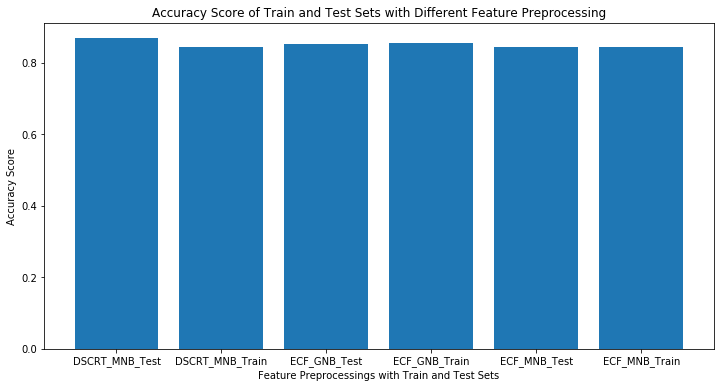

In [86]:
plt.figure(figsize=(12,6))
plt.title('Accuracy Score of Train and Test Sets with Different Feature Preprocessing')
plt.xlabel('Feature Preprocessings with Train and Test Sets')
plt.ylabel('Accuracy Score')
plt.bar(all_scores_acc.keys(), all_scores_acc.values())

After doing discretization, Multinomial Naive Bayes is performaing better than Encoding Categorical Features - Gaussian Naive Bayes and Encoding Categorical Features - Multinomial Naive Bayes in both Train and Test sets for accuracy score.

<Container object of 6 artists>

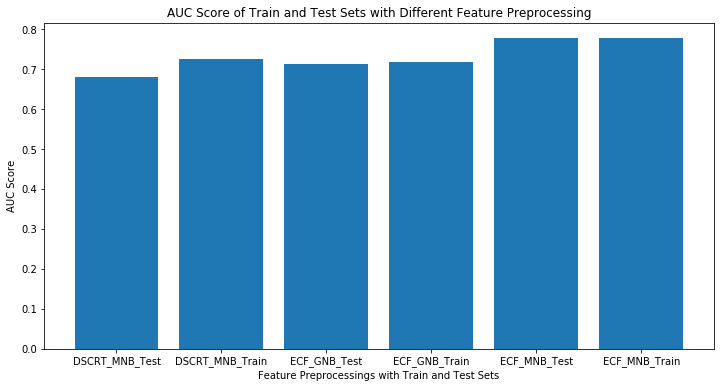

In [87]:
plt.figure(figsize=(12,6))
plt.title('AUC Score of Train and Test Sets with Different Feature Preprocessing')
plt.xlabel('Feature Preprocessings with Train and Test Sets')
plt.ylabel('AUC Score')
plt.bar(all_scores_auc.keys(), all_scores_auc.values())

After doing discretization, Multinomial Naive Bayes is performaing worse than Encoding Categorical Features - Gaussian Naive Bayes and Encoding Categorical Features - Multinomial Naive Bayes in both Train and Test sets for area under curve score.

In [88]:
for rand_seed in seed_list:
    X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='y'), df.y, random_state=rand_seed, test_size=0.30)
    
    for x in numeric:
        X_train[x] = kbin.fit_transform(X_train[[x]])
    
    mnb = MultinomialNB()
    mnb.fit(X_train, y_train)
    
    pred = mnb.predict(X_train)
    acc_train.append(accuracy_score(y_train, pred))
    auc_train.append(roc_auc_score(y_train, pred))
    
    pred = mnb.predict(X_test)
    acc_test.append(accuracy_score(y_test, pred))
    auc_test.append(roc_auc_score(y_test, pred))

all_scores_acc['DSCRT_MNB_Train'] = pd.Series(acc_train).mean()
all_scores_auc['DSCRT_MNB_Train'] = pd.Series(auc_train).mean()

all_scores_acc['DSCRT_MNB_Test'] = pd.Series(acc_test).mean()
all_scores_auc['DSCRT_MNB_Test'] = pd.Series(auc_test).mean()

In [89]:
rfe_acc_list_train = [0]
rfe_acc_list_test = [0]

rfe_auc_list_train = [0]
rfe_auc_list_test = [0]

for no_fe in range(1, X_train.shape[1]+1):
    mnb_rfe = MultinomialNB()
    rfe = RFE(mnb_rfe, no_fe, step=1)
    rfe = rfe.fit(X_train, y_train)
    
    rfe_pred = rfe.predict(X_train)
    rfe_acc_list_train.append(accuracy_score(y_train, rfe_pred))
    rfe_auc_list_train.append(roc_auc_score(y_train, rfe_pred))
    
    rfe_pred = rfe.predict(X_test)
    rfe_acc_list_test.append(accuracy_score(y_test, rfe_pred))
    rfe_auc_list_test.append(roc_auc_score(y_test, rfe_pred))

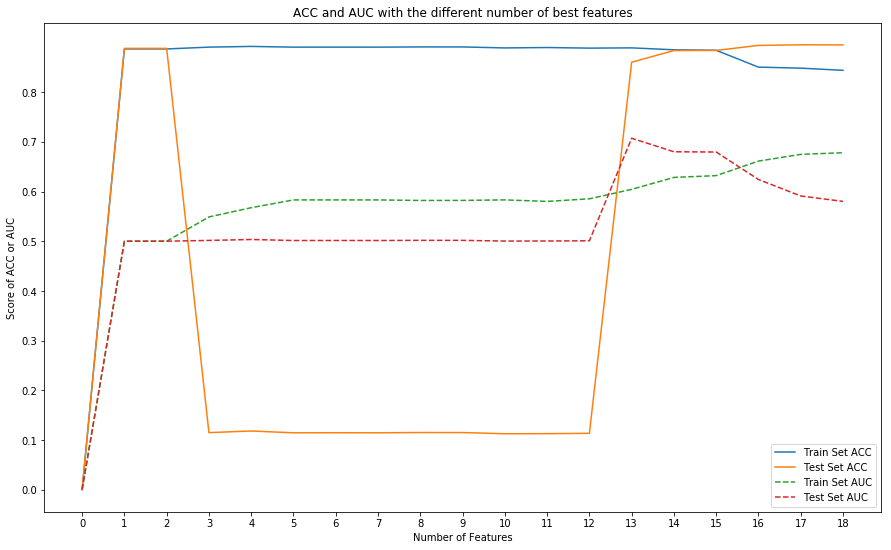

In [90]:
features = [x for x in range (0, 19)]
plt.figure(figsize=(15,9))
plt.plot(rfe_acc_list_train, label='Train Set ACC')
plt.plot(rfe_acc_list_test, label='Test Set ACC')
plt.plot(features, rfe_auc_list_train, label='Train Set AUC', linestyle='--')
plt.plot(features, rfe_auc_list_test, label='Test Set AUC', linestyle='--')
plt.xticks(np.arange(min(features), max(features)+1, 1.0))
plt.yticks(np.arange(min(rfe_acc_list_test), max(rfe_acc_list_test), 0.1))
plt.ylabel('Score of ACC or AUC')
plt.xlabel('Number of Features')
plt.title('ACC and AUC with the different number of best features')
plt.legend()
plt.show()

In [91]:
def printBest(lst, st):
    print(st+str(' Best Case Features'))
    print('Number of features selected: '+str(lst.index(max(lst)))+' out of '+str(len(lst)-1)+' => Score: '+str(max(lst)))
    print()
    
def printWorst(lst, st):
    print(st+str(' Worst Case Features'))
    print('Number of features selected: '+str(lst.index(min(lst[1:])))+' out of '+str(len(lst)-1)+' => Score: '+str(min(lst[1:])))
    print()

print("Best Case Features:\n----------------------\n")
printBest(rfe_acc_list_train, 'Train Set ACC')
printBest(rfe_acc_list_test, 'Test Set ACC')
printBest(rfe_auc_list_train, 'Train Set AUC')
printBest(rfe_auc_list_test, 'Test Set AUC')
print("Worst Case Features:\n----------------------\n")
printWorst(rfe_acc_list_train, 'Train Set ACC')
printWorst(rfe_acc_list_test, 'Test Set ACC')
printWorst(rfe_auc_list_train, 'Train Set AUC')
printWorst(rfe_auc_list_test, 'Test Set AUC')

Best Case Features:
----------------------

Train Set ACC Best Case Features
Number of features selected: 4 out of 18 => Score: 0.892095314071659

Test Set ACC Best Case Features
Number of features selected: 17 out of 18 => Score: 0.8953629521728574

Train Set AUC Best Case Features
Number of features selected: 18 out of 18 => Score: 0.6781035330747206

Test Set AUC Best Case Features
Number of features selected: 13 out of 18 => Score: 0.7072746902083078

Worst Case Features:
----------------------

Train Set ACC Worst Case Features
Number of features selected: 18 out of 18 => Score: 0.8439873747008428

Test Set ACC Worst Case Features
Number of features selected: 10 out of 18 => Score: 0.11232499797685522

Train Set AUC Worst Case Features
Number of features selected: 1 out of 18 => Score: 0.5

Test Set AUC Worst Case Features
Number of features selected: 1 out of 18 => Score: 0.5

